<a href="https://colab.research.google.com/github/DrPasidth/Add-Thai-Font-to-PCPDF/blob/main/ANNmnistByKai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import cv2
import numpy as np

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [3]:
mnist = tf.keras.datasets.mnist

In [58]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [59]:
from google.colab.patches import cv2_imshow

In [61]:
cv2_imshow(x_train[0])

In [63]:
print(y_train[0])

5


In [64]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [65]:
x_train = x_train/255
x_test = x_test/255

In [66]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [67]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [68]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [70]:
model.fit(x_train,y_train,epochs=10)
#train (x,y,number train)
#loss => lower, accuracy =>higher

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2305 - accuracy: 0.9322
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1006 - accuracy: 0.9693
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0717 - accuracy: 0.9774
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0527 - accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0416 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0348 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0279 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0231 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0228 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.018

In [71]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0950 - accuracy: 0.9778


[0.09499649703502655, 0.9778000116348267]

In [82]:
predict_image = "/content/number9.jpg"

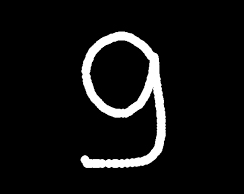

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 21ms/step
[[2.34569325e-06 1.51919409e-07 1.36269718e-05 2.08249494e-01
  8.50912911e-05 6.71196163e-01 2.40802876e-07 1.29144610e-05
  1.03027059e-03 1.19409665e-01]]
5


In [83]:
import cv2
image = cv2.imread(predict_image)
cv2_imshow(image)

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

imageout = cv2.resize(gray, (28,28))
print(imageout.shape)
imageout = imageout/255
imageout = imageout.reshape(1,28,28)
print(imageout.shape)

output = model.predict(imageout)

print(output)
print(np.argmax(output))